In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'
fontname = 'AppleGothic'

fontname = 'AppleGothic' # seaborn의 set 함수 사용할 경우 지정해줬음 
sns.set(style='whitegrid', font = fontname)

### 업종별 앱 이용 데이터

In [43]:
app_type = pd.read_excel('data/3.앱/업종별_앱_이용_데이터.xlsx')
app_type.columns = ['업종', '요일', '1월 첫째주 (1/3~5)', '1월 둘째주 (1/10~12)', '1월 셋째주 (1/17~19)', '1월 넷째주 (1/24~26)', '2월 첫째주 (1/31~2/2)', '2월 둘째주 (2/7~9)', '2월 셋째주 (2/14~16)']
app_type = app_type.drop([0])
app_type_0 = app_type.copy()

app_type = app_type_0[app_type_0['요일'] != '금토일 하루 평균']
app_type

,업종,요일,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9),2월 셋째주 (2/14~16)
1,배달,금요일,2111579,2517833,2454286,2571396,3146737,2242374,2519570
2,배달,토요일,2551524,2802552,2890984,2328707,3155424,3104932,3114521
3,배달,일요일,2880262,3123115,2862434,2668244,3133119,3190416,3279879
5,소셜커머스/오픈마켓,금요일,11579837,11336675,11315332,9707902,11180179,11959435,11903389
6,소셜커머스/오픈마켓,토요일,11753112,11327375,11590802,10087339,12583801,11602615,11575608
7,소셜커머스/오픈마켓,일요일,11841969,11734164,11464518,10764017,12452070,11962325,11763060
9,대중교통,금요일,3001059,3346756,3115895,2110746,2991609,3007083,3011071
10,대중교통,토요일,2881352,2742370,2816131,2063815,2526949,1925054,2417532
11,대중교통,일요일,2485701,2313000,2523618,2189719,2050432,1754139,2157925
13,영화관,금요일,1106471,1383952,1446557,1812766,1227969,1077286,1374938


In [45]:
app_type_average = app_type_0[app_type_0['요일'] == '금토일 하루 평균']
app_type_average

,업종,요일,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9),2월 셋째주 (2/14~16)
4,배달,금토일 하루 평균,2514455,2814500,2735901,2522782,3145093,2845907,2971323
8,소셜커머스/오픈마켓,금토일 하루 평균,11724973,11466071,11456884,10186419,12072017,11841458,11747352
12,대중교통,금토일 하루 평균,2789371,2800709,2818548,2121427,2522997,2228759,2528843
16,영화관,금토일 하루 평균,1206139,1339038,1397270,1862536,1179596,1080184,1333958


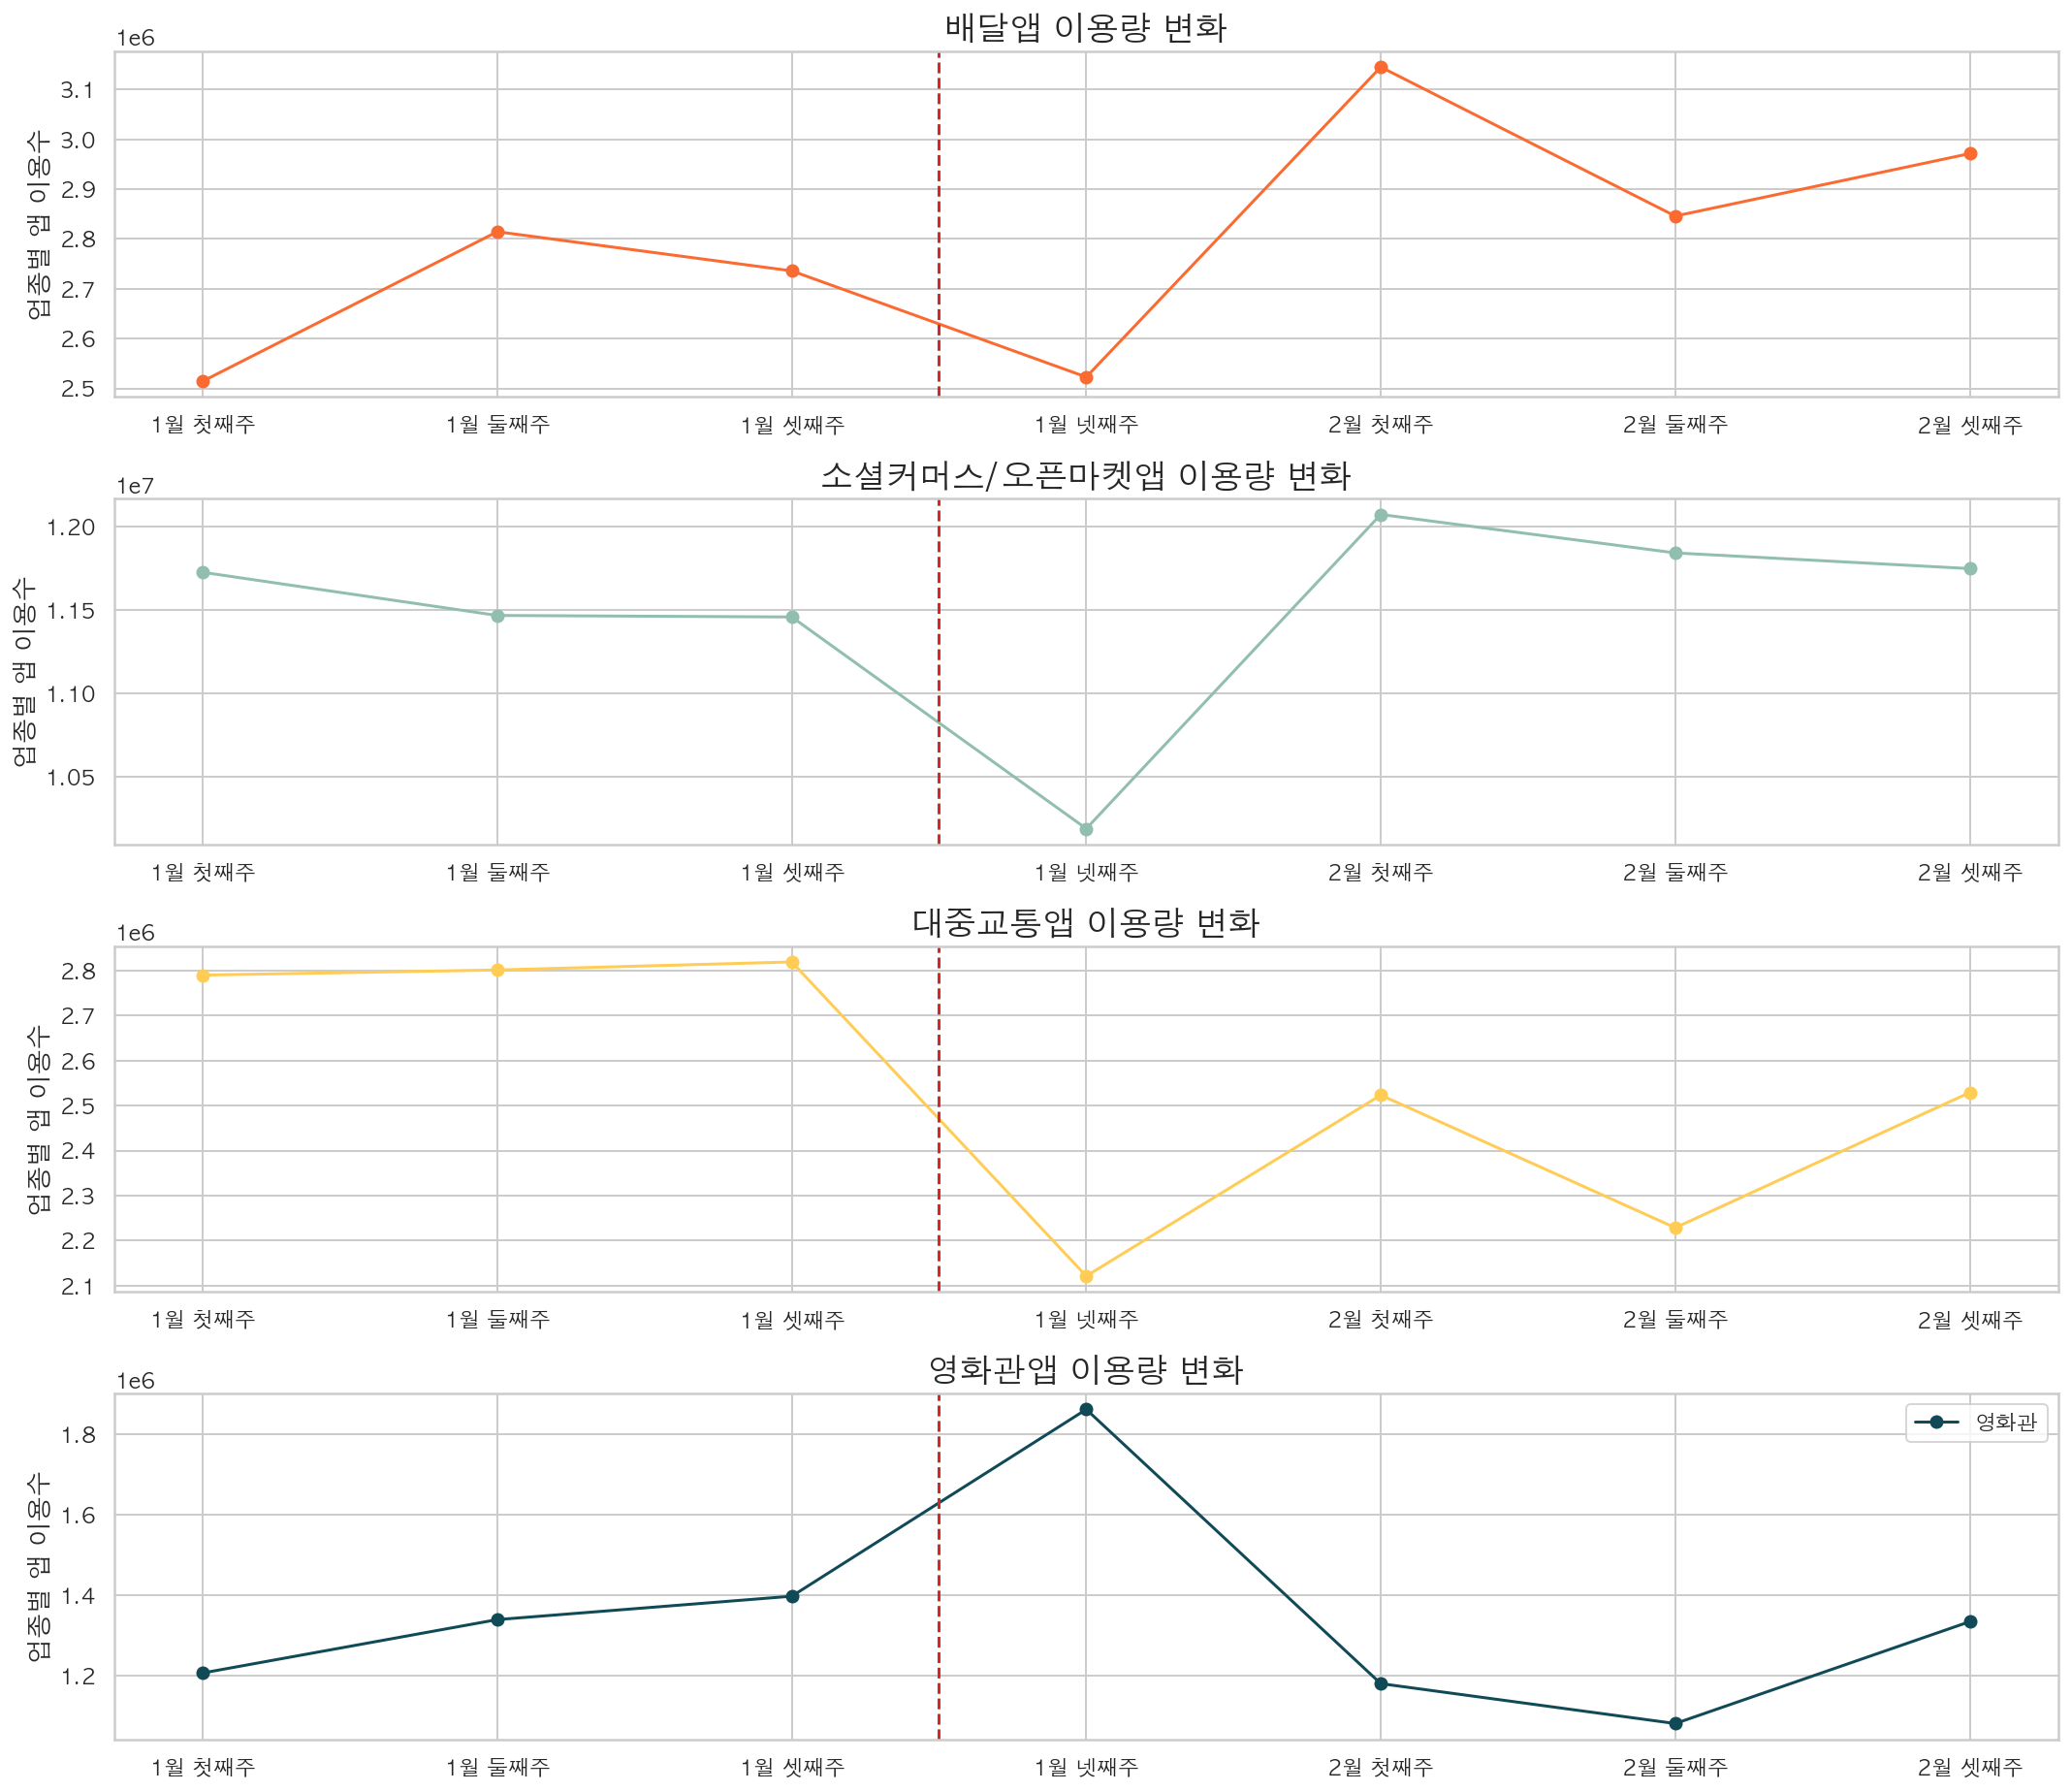

In [81]:
plt.figure(figsize = (15, 13))

for i in range(4):
    plt.subplot(4, 1, i+1)
    
    app = app_type_average.iloc[i, 2:]
    typeofapp = ['배달', '소셜커머스/오픈마켓', '대중교통', '영화관']
    color = ['#fb6a31', '#92beaf', '#ffcc56', '#104a56']
    x = ['1월 첫째주', '1월 둘째주', '1월 셋째주', '1월 넷째주', '2월 첫째주', '2월 둘째주', '2월 셋째주']
    
    plt.plot(x, app, 'ko-', label = typeofapp[i], color=color[i])
    plt.axvline(2.5, color='tab:red', linestyle = '--')

    plt.title(typeofapp[i] + '앱 이용량 변화', fontsize = 17)
    plt.ylabel('업종별 앱 이용수', fontsize = 13)

plt.tight_layout()
plt.legend()
plt.show()

영화관 앱의 사용료만 1월 넷째 주 기준으로 감소하고 있는 양상, 나머지 배달, 소셜커머스 앱은 증가하는 모습을 보여주고 있음.  
대중교통앱은 꾸준한 그래프를 보이다 확진자 발생 기점으로 변동이 많은 그래프로 변화

### 앱 별 이용 데이터

In [94]:
app = pd.read_excel('data/3.앱/앱별_사용량.xlsx')
app

,앱이름,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9)
0,카카오톡 KakaoTalk,24709872.0,24716810,24722510,24760095.0,25149199.0,25073746
1,네이버 - NAVER,15527805.0,15668239,15740938,15684910.0,15872699.0,15946382
2,YouTube,14506025.0,14663865,15020886,14403537.0,14702808.0,14824035
3,삼성 갤러리,11005314.0,11393097,11319062,10298020.0,11162078.0,10970910
4,OK캐쉬백 [즐거움이 포인트다],8472387.0,8297115,8079567,8008192.0,8232793.0,8214496
...,...,...,...,...,...,...,...
145,SOL알리미,371170.0,532898,326730,215210.0,422783.0,377280
146,삼성카드,460265.0,510363,465379,411935.0,577582.0,372538
147,교보문고,378797.0,355959,249142,NaN,337932.0,362399
148,하나카드 App,346661.0,379135,268317,177320.0,303762.0,360661


코로나 이후 상승했을것으로 예측되는 각 업종을 대표하는 어플 상위 2~5종 만 그룹

In [121]:
# delivery
delivery = app[(app['앱이름'] == '배달의민족') | (app['앱이름'] == '배달요기요')]
delivery

,앱이름,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9)
29,배달의민족,2019341.0,2280004,2114740,2129298.0,2329349.0,2313672
54,배달요기요,951139.0,994308,1171529,901021.0,1417912.0,1111576


In [99]:
# sns
sns = app[(app['앱이름'] == '카카오톡 KakaoTalk') | (app['앱이름'] == 'YouTube') | (app['앱이름'] == 'Instagram') | (app['앱이름'] == 'Facebook') | (app['앱이름'] == '밴드') ]
sns

,앱이름,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9)
0,카카오톡 KakaoTalk,24709872.0,24716810,24722510,24760095.0,25149199.0,25073746
2,YouTube,14506025.0,14663865,15020886,14403537.0,14702808.0,14824035
6,Instagram,7052071.0,6952214,6969046,7108650.0,7089760.0,7183971
10,Facebook,5055141.0,5305791,5233456,5306817.0,5368826.0,5134592
14,밴드,4630742.0,4719958,4788900,4090030.0,4720606.0,4497779


In [100]:
# shopping
shopping = app[(app['앱이름'] == '쿠팡 (Coupang)') | (app['앱이름'] == '11번가') | (app['앱이름'] == '쇼핑을 바꾸는 쇼핑. G마켓') | (app['앱이름'] == '위메프 - 특가대표 (특가 / 쇼핑 / 쇼핑앱 / 쿠폰 / 배송)') | (app['앱이름'] == '티몬 - 매주 월요일은 티몬데이') ]
shopping

,앱이름,1월 첫째주 (1/3~5),1월 둘째주 (1/10~12),1월 셋째주 (1/17~19),1월 넷째주 (1/24~26),2월 첫째주 (1/31~2/2),2월 둘째주 (2/7~9)
9,쿠팡 (Coupang),5332363.0,4952884,5097629,4090376.0,5370235.0,5156652
11,11번가,4479926.0,4572737,4432816,4424682.0,4865472.0,4987626
17,쇼핑을 바꾸는 쇼핑. G마켓,3405836.0,3637200,3534077,2935121.0,3563281.0,3564002
18,위메프 - 특가대표 (특가 / 쇼핑 / 쇼핑앱 / 쿠폰 / 배송),3590659.0,3637865,3375453,2969788.0,3975166.0,3458817
20,티몬 - 매주 월요일은 티몬데이,2994528.0,2967926,2671718,2538218.0,3396004.0,3148708


정규화 함수 및 그래프 함수 정의

In [119]:
def normalization(x):
    min_value = min(x)
    max_value = max(x) 

    return list(map(lambda x: (x-min_value)/(max_value-min_value), x))

In [127]:
def normalapply(df):
    answer = []
    for i in range(len(df.index)):
        tolist = df.iloc[i, 1:].values.tolist()
        tolist = normalization(tolist)
        answer.append(tolist)
    
    return answer

In [154]:
def appgraph(df):
    plt.figure(figsize = (15, 13))

    for i in range(len(df.index)):
        plt.subplot(len(df.index), 1, i+1)
        df_normal = normalapply(df)
        
        app = df_normal[i]
        typeofapp = df['앱이름'].tolist()
        color = ['#fb6a31', '#92beaf', '#ffcc56', '#104a56', '#c8713e']
        x = ['1월 첫째주', '1월 둘째주', '1월 셋째주', '1월 넷째주', '2월 첫째주', '2월 둘째주']

        plt.plot(x, app, 'ko-', label = typeofapp[i], color=color[i])
        plt.axvline(2.5, color='tab:red', linestyle = '--')

        plt.title(typeofapp[i] + '이용량 변화', fontsize = 17)
        plt.ylabel('앱 이용량', fontsize = 13)

    plt.tight_layout()
    plt.legend()
    plt.show()

배달앱

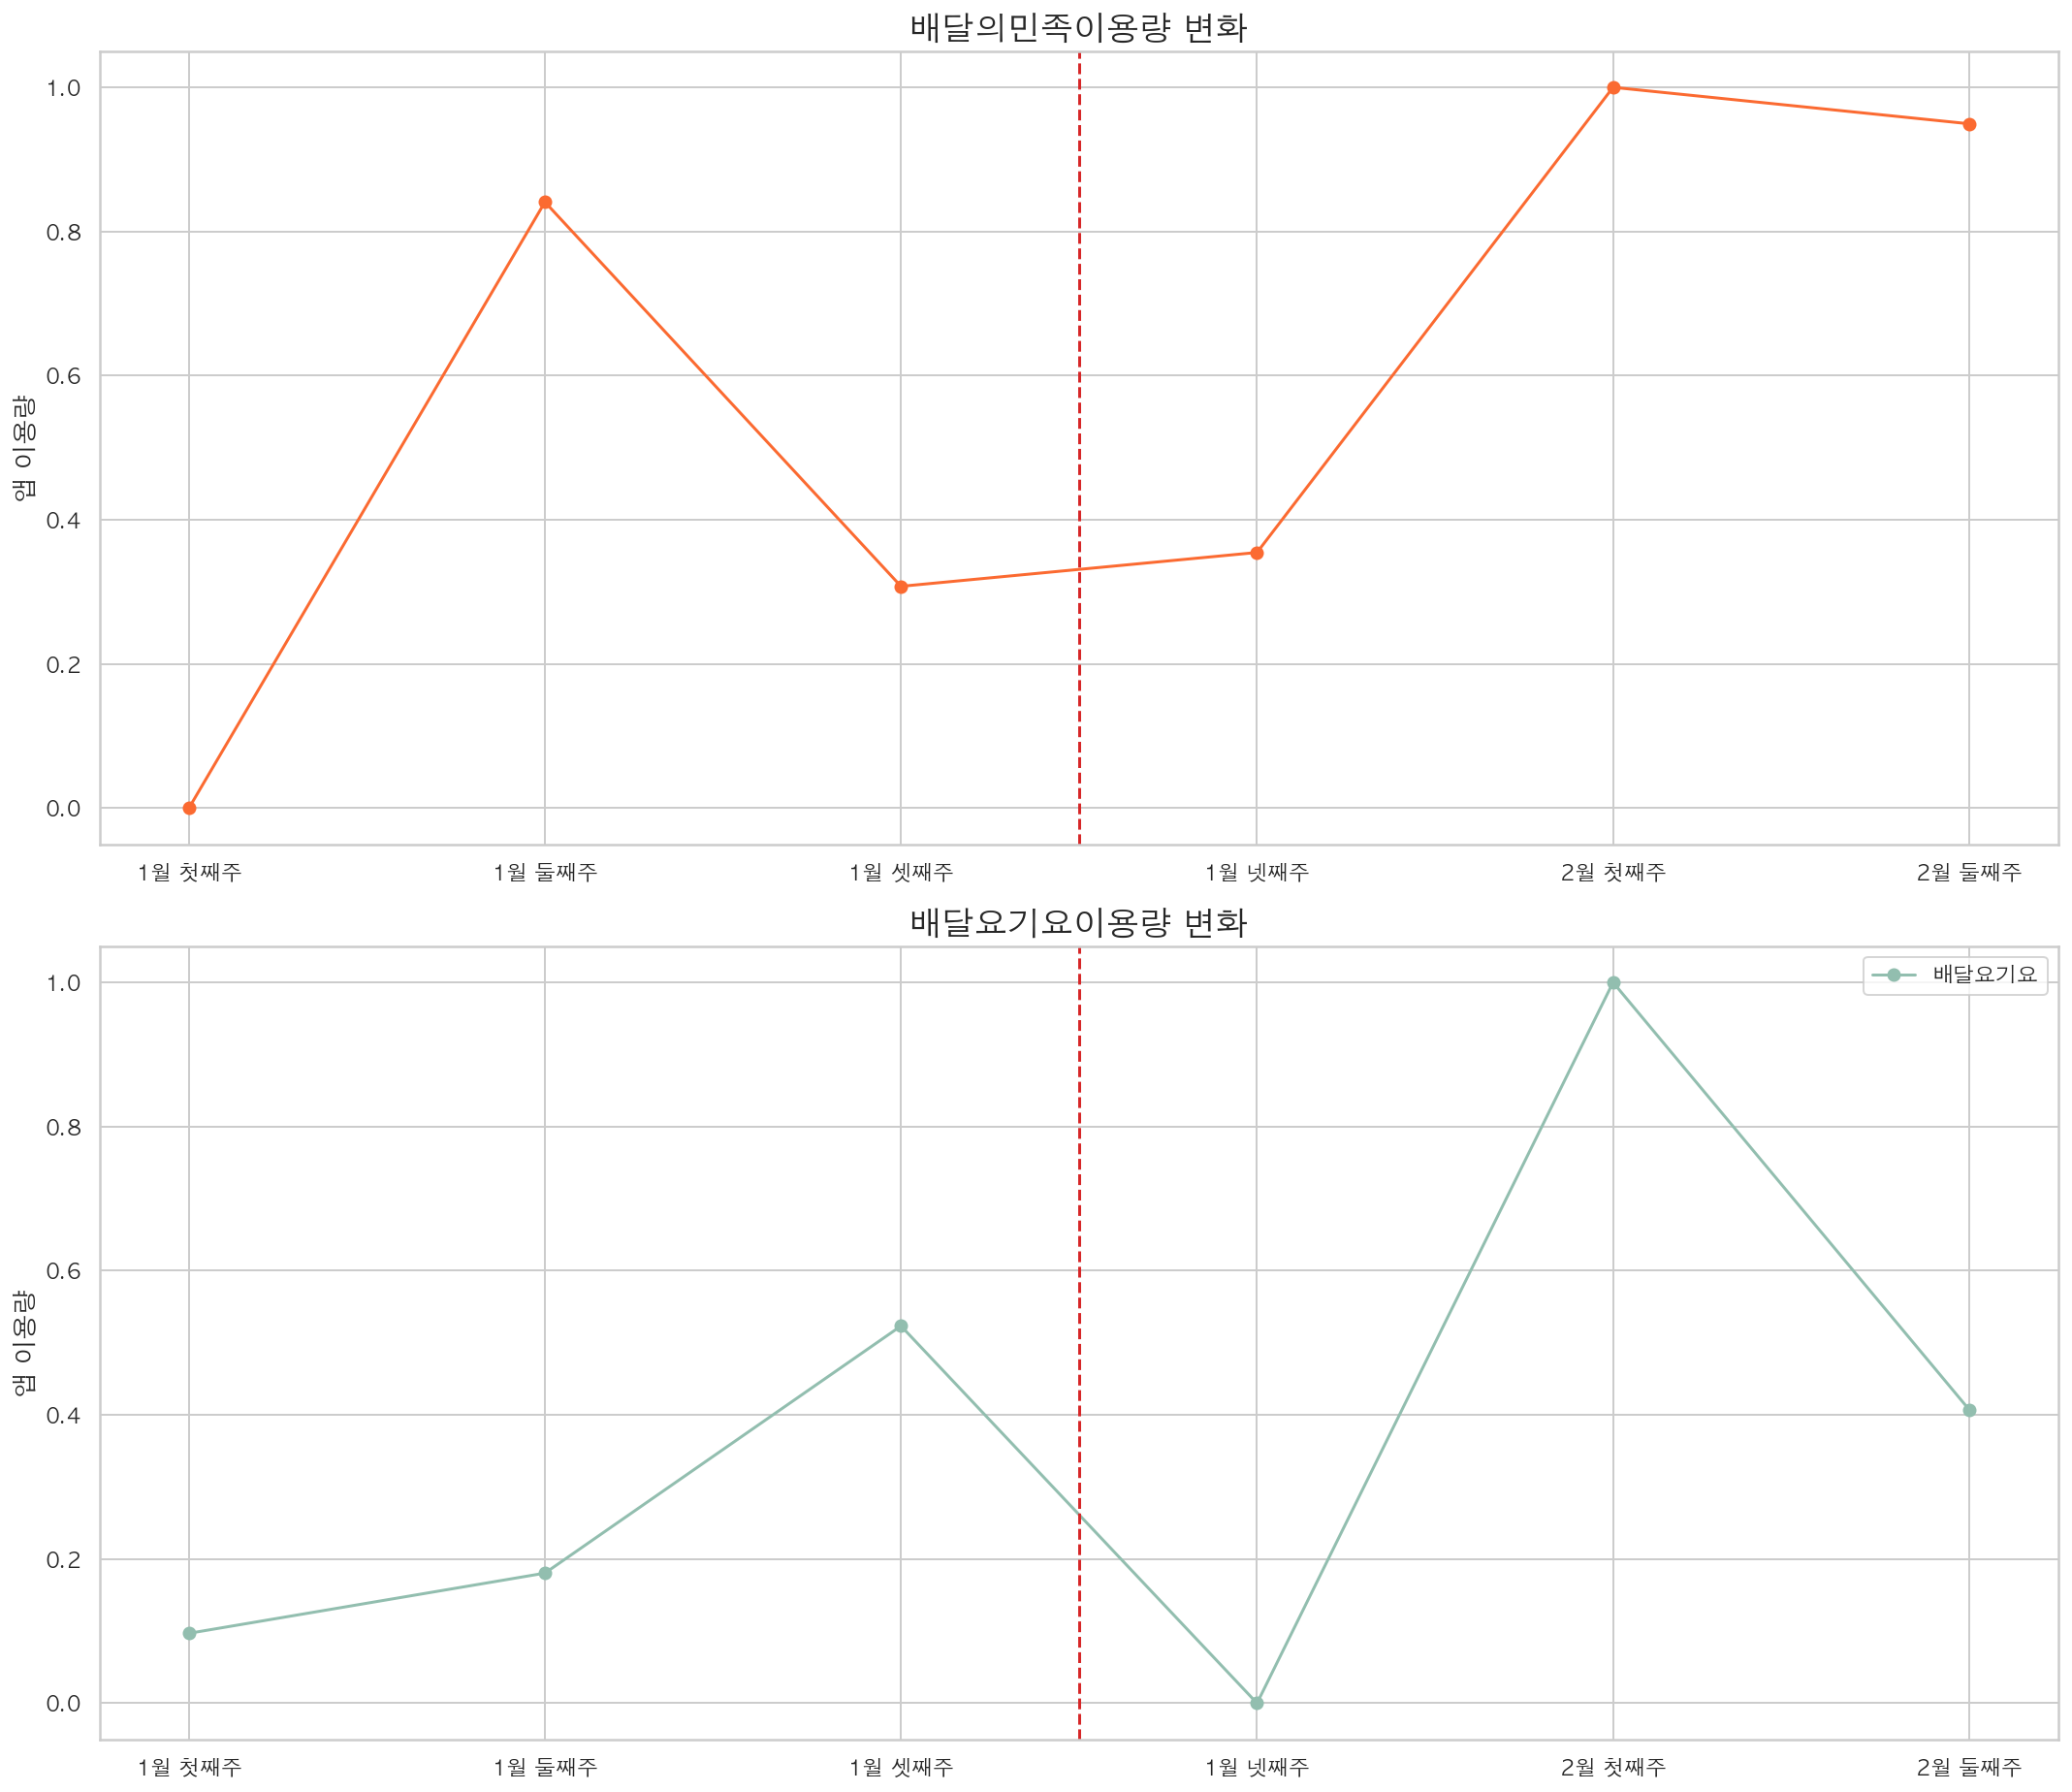

In [155]:
appgraph(delivery)

sns 앱

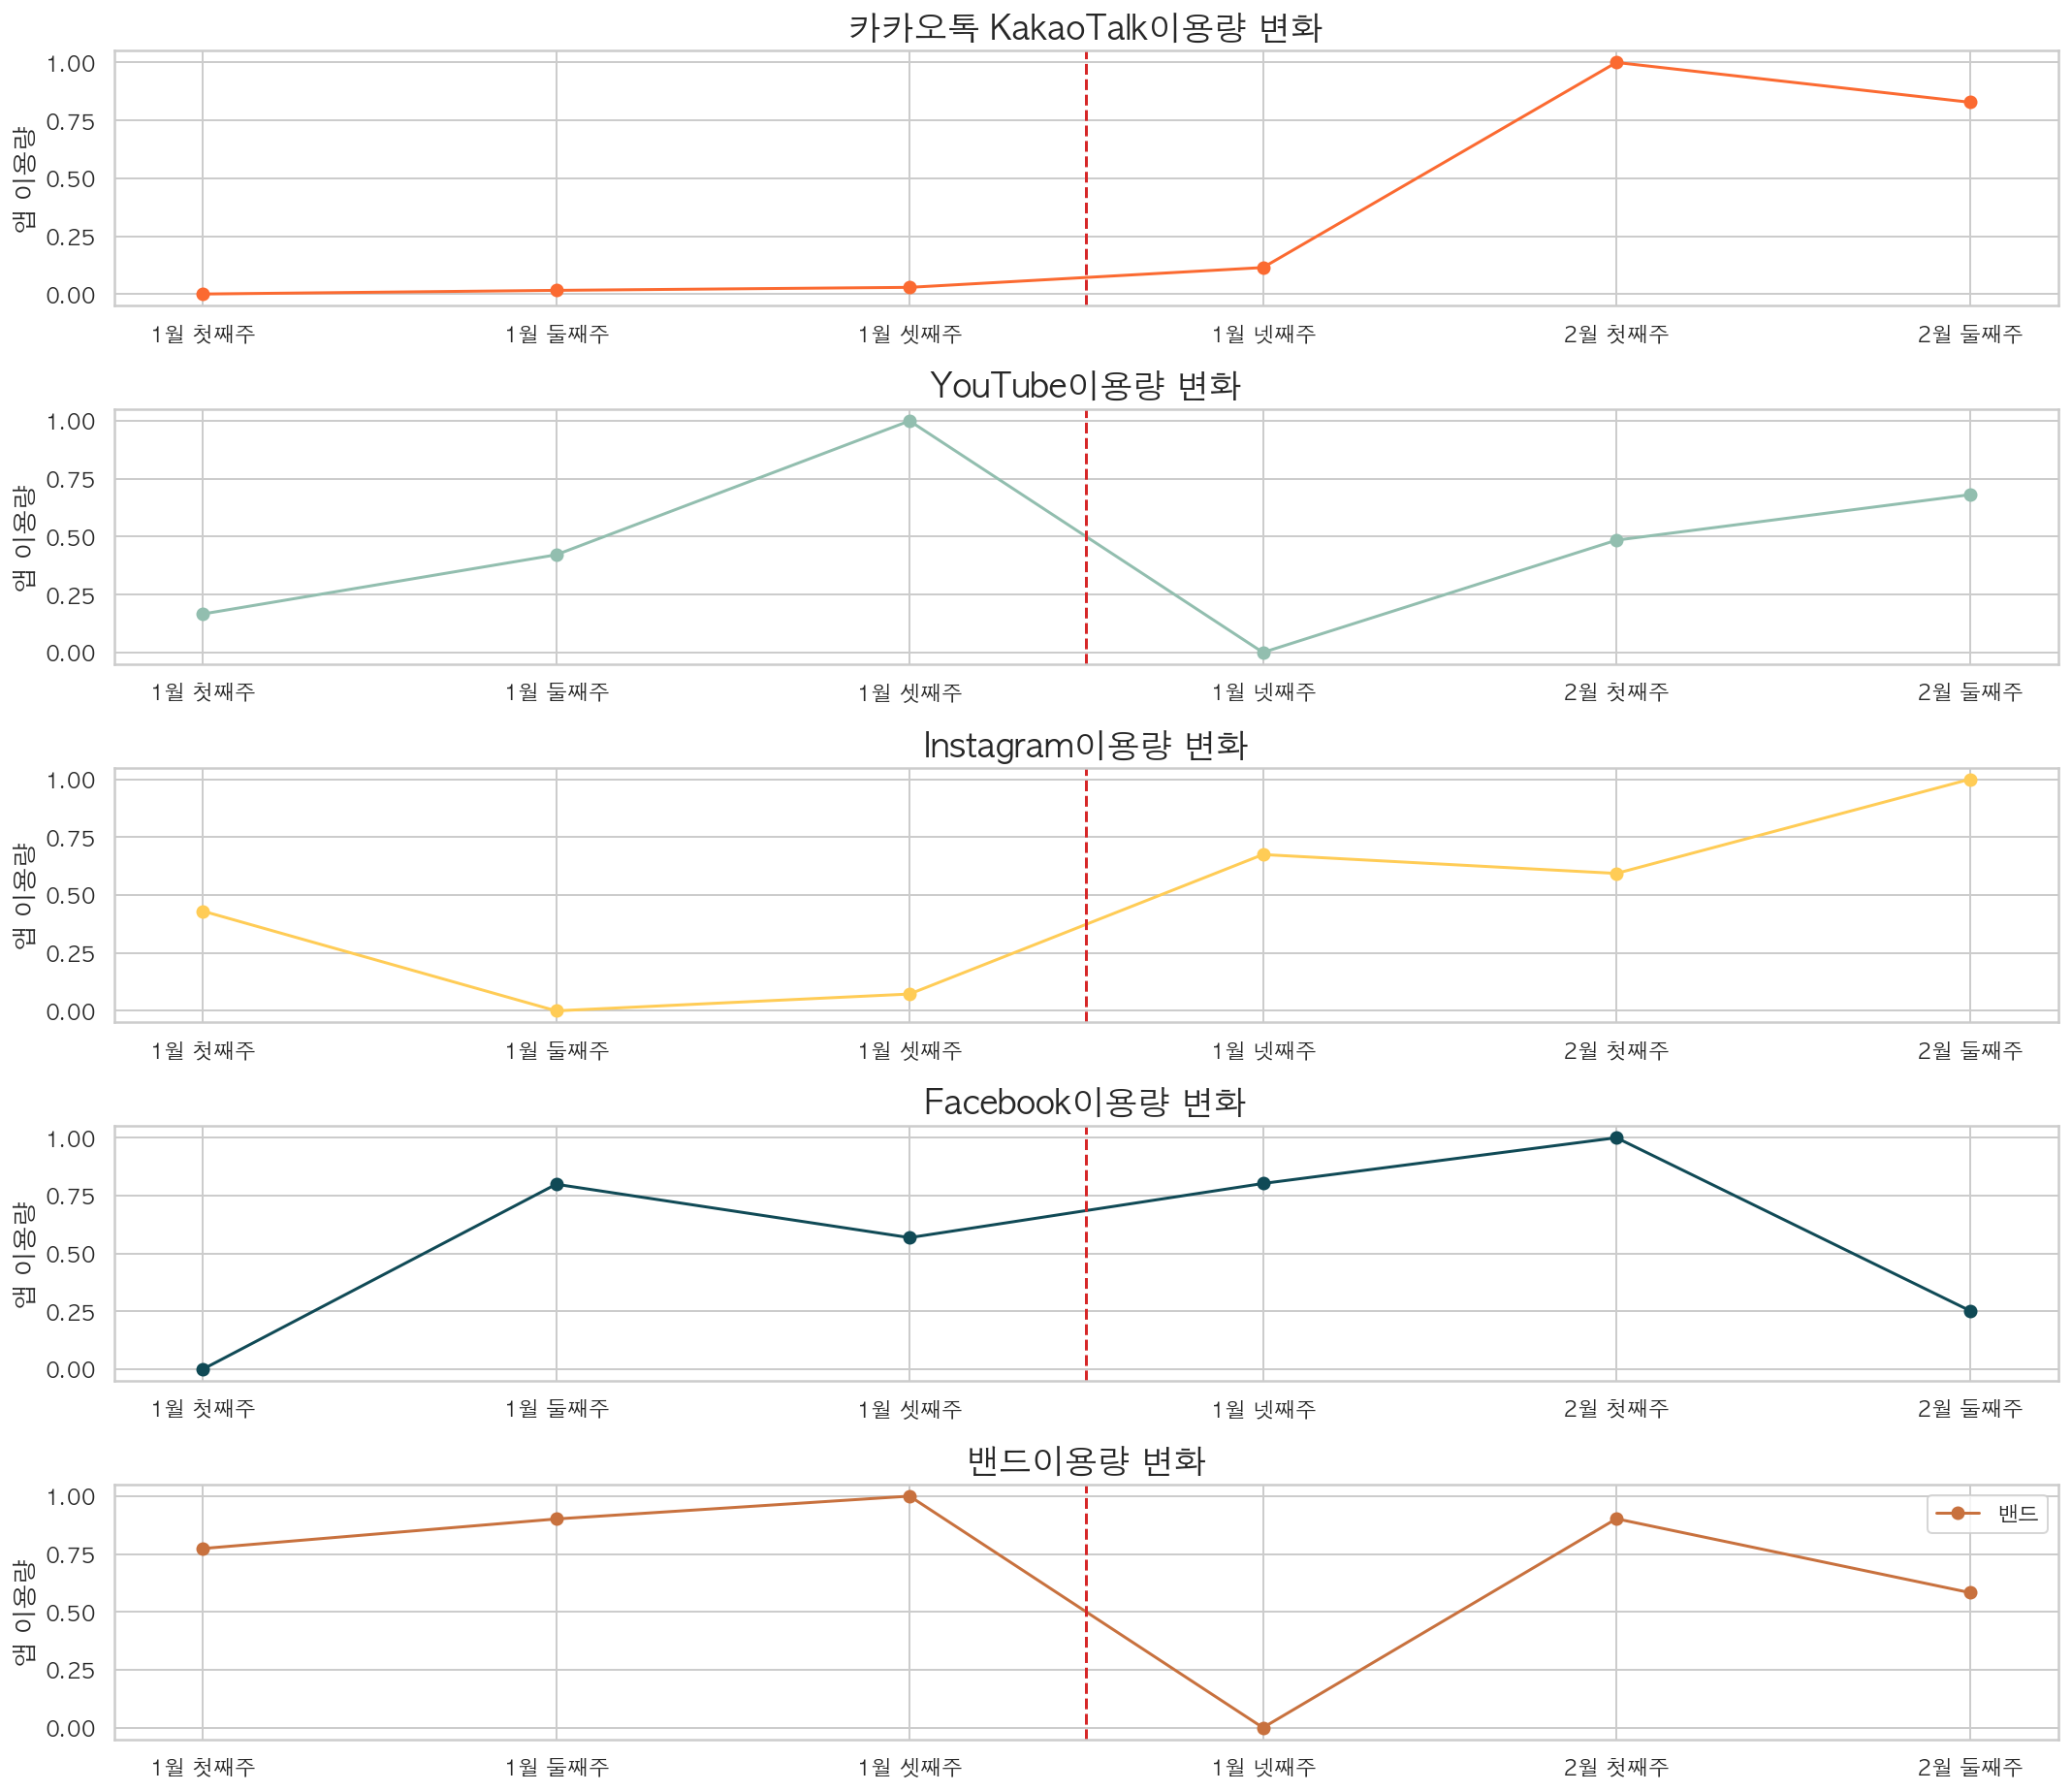

In [156]:
appgraph(sns)

온라인 쇼핑앱

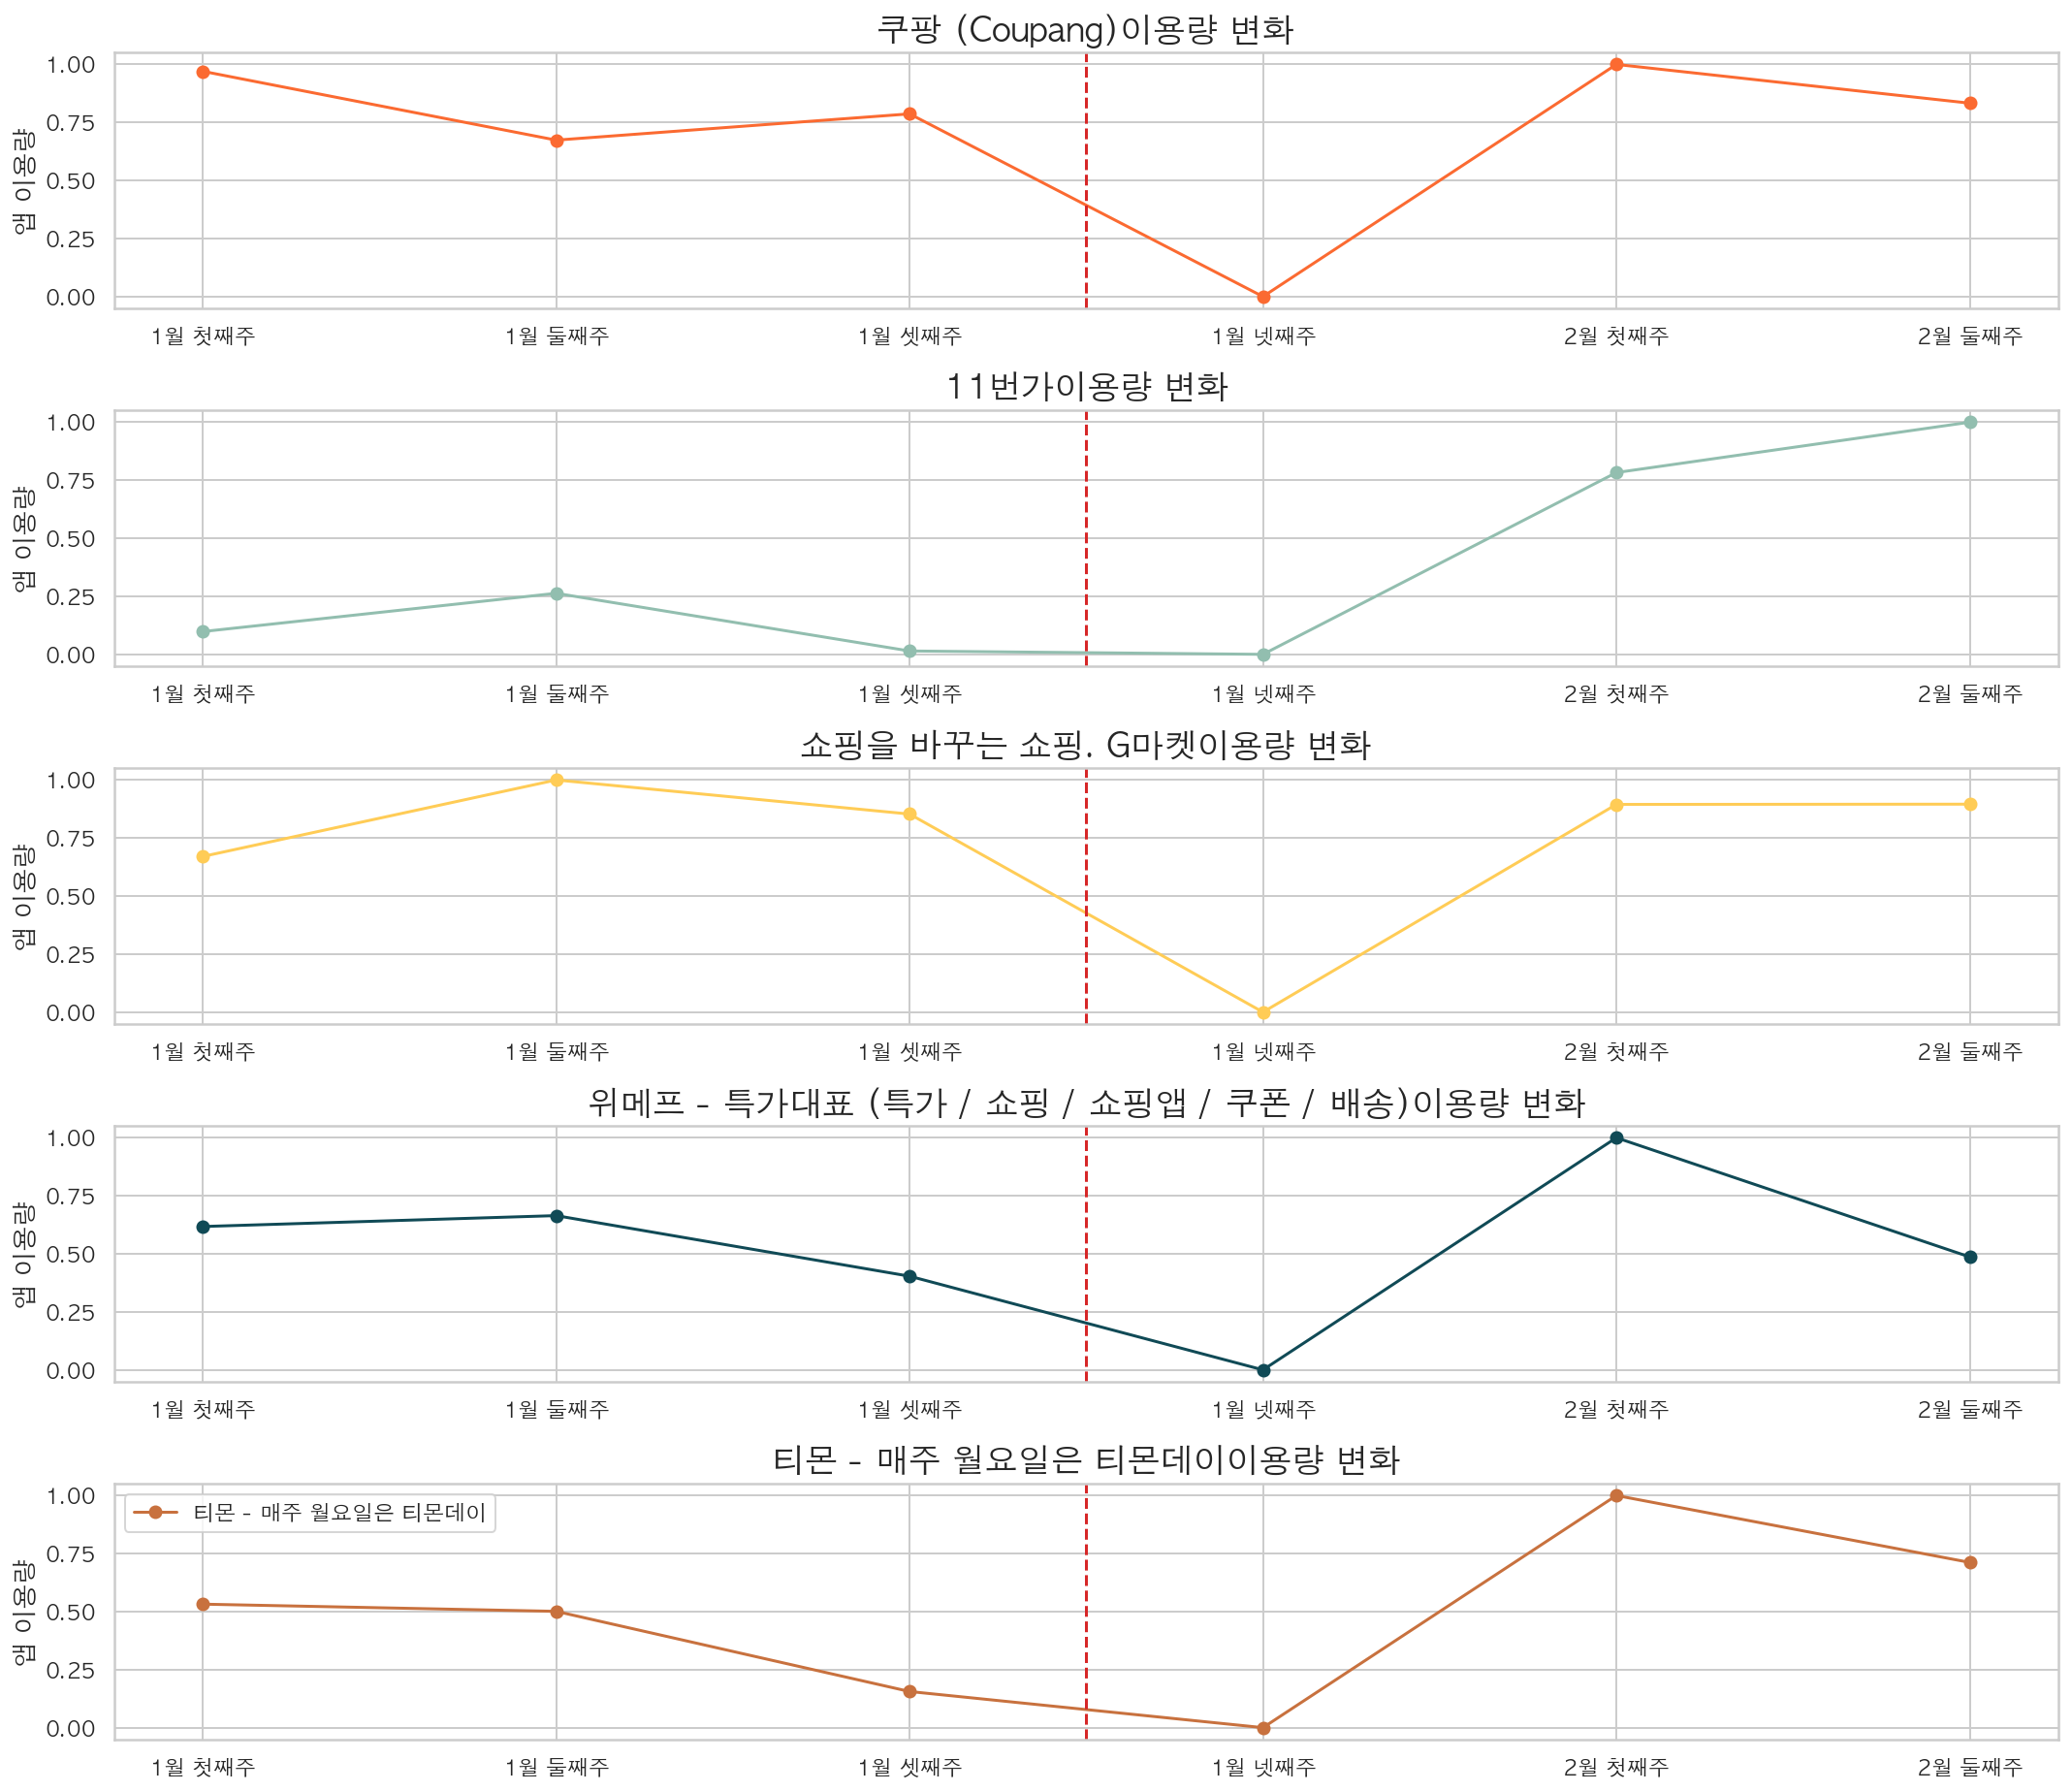

In [157]:
appgraph(shopping)